In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy
import flywheel

# set figure resolution
import matplotlib as mpl
dpi=300
mpl.rcParams['figure.dpi'] = dpi
mpl.rc("savefig", dpi=dpi)

In [2]:
fw = flywheel.Client()
project_id = '5e50277c6dea314fa72a7440'
project = fw.get(project_id)
subjects = [fw.get_subject(x.id) for x in fw.get_project_subjects(project_id)]

In [3]:
# initialize target columns
row_list = []
for subject in subjects:
    if subject.info and subject.sex:
        sex = subject.sex
        hb = subject.info['Hb']
        row = [subject.label, hb, sex]
        row_list.append(row)


df = pd.DataFrame(row_list,columns=['subject_label','Hb','sex'])
df.head()

subject_label    Hb     sex
0         HC001  14.6    male
1         HC002  12.1    male
2         HC003  13.7  female
3         HC004  13.1    male
4         HC005  12.2    male

## Plot Hb data

Text(0.5, 1.0, 'Distribution of Hb measurements')

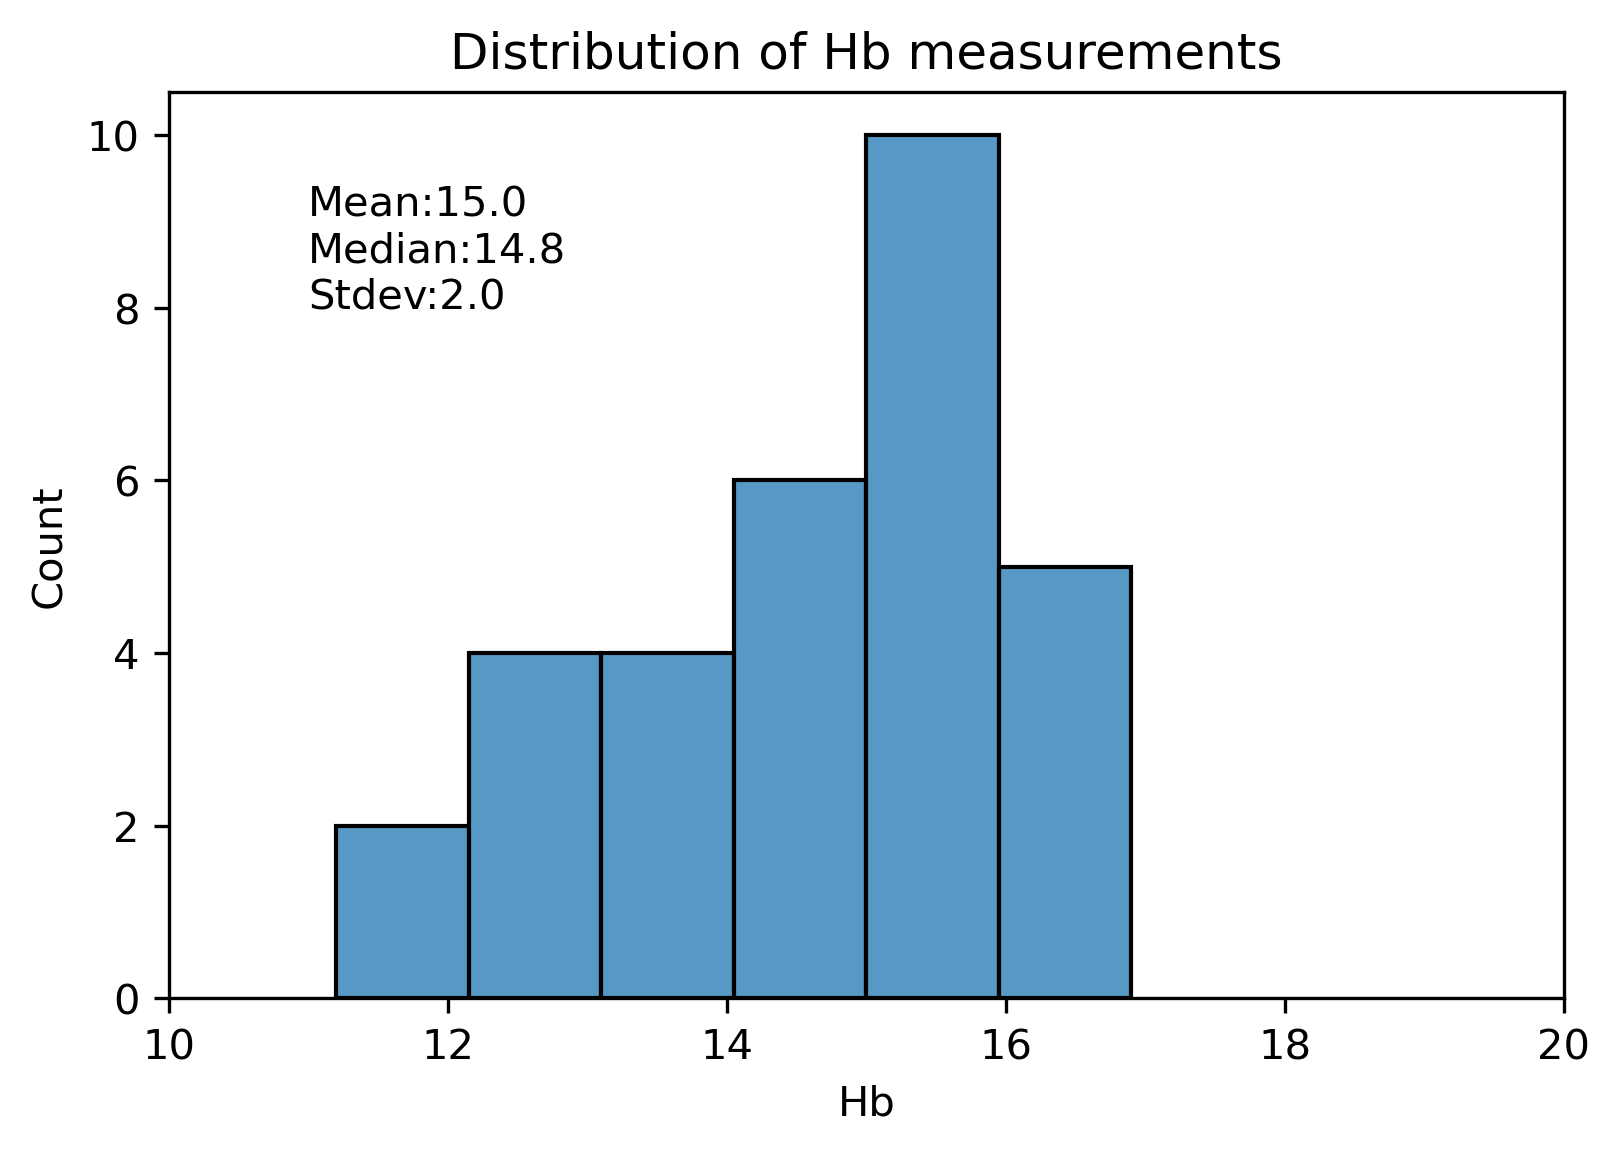

In [4]:
# get mean, median, std of Hb values
mean_hb = np.round(np.mean(df.Hb))
median_hb = np.median(df.Hb)
std_hb = np.round(np.std(df.Hb))

ax = sns.histplot(data=df, x='Hb')
ax.set_xlim(10,20)
ax.text(11,8,'Mean:{}\nMedian:{}\nStdev:{}'.format(mean_hb, median_hb, std_hb))
ax.set_title('Distribution of Hb measurements')

Text(0.5, 1.0, 'Hb measurements by sex')

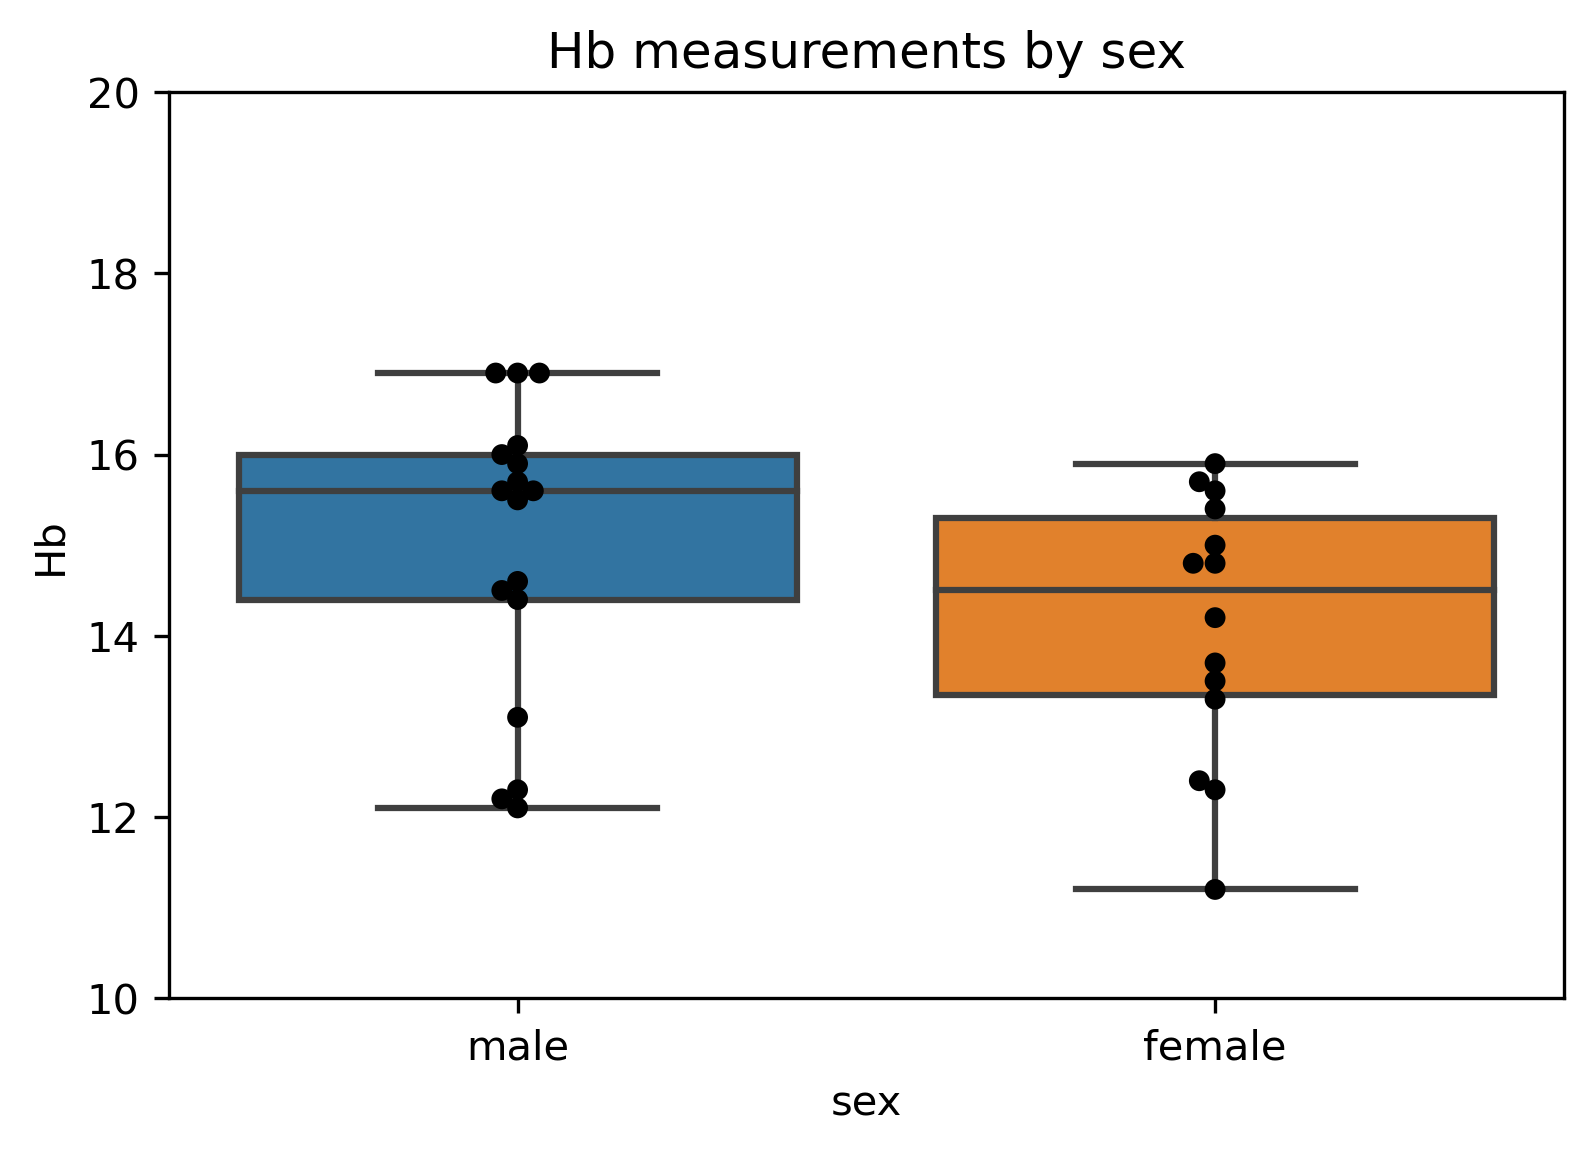

In [5]:
ax2 = sns.boxplot(data=df, x='sex',y='Hb')
ax2 = sns.swarmplot(data=df, x='sex',y='Hb',color="k")
ax2.set_ylim(10,20)
ax2.set_title("Hb measurements by sex")

## Get 10 lowest and 10 highest Hb subjects

In [6]:
dm_df = pd.read_csv('refined_dM.csv')
dm_df_sort = dm_df.sort_values('Hb')
dm_df_sort.head()

session_id  \
44  sub-HC007_ses-MR_BASELINE   
43  sub-HC007_ses-MR_FOLLOWUP   
21  sub-HC002_ses-MR_FOLLOWUP   
23  sub-HC005_ses-MR_FOLLOWUP   
22  sub-HC005_ses-MR_BASELINE   

                                          gray_matter  \
44  [0.021674, 0.021724, 0.016852, 0.020343, 0.012...   
43  [0.046674, 0.047066, 0.024435, 0.033128, 0.022...   
21  [0.014276, 0.01483, 0.00963, 0.008152, nan, na...   
23  [0.022244, 0.017955, 0.0194, 0.014651, 0.01350...   
22  [0.030915, 0.028319, 0.021014, 0.018556, 0.016...   

                                                  acc  \
44  [0.016783, 0.017704, 0.014404, 0.01614, 0.0116...   
43  [0.03075, 0.02705, 0.016731, 0.022686, 0.01087...   
21  [0.016826, 0.012449, 0.012696, 0.008985, 0.007...   
23  [0.030378, 0.021136, 0.013982, 0.017686, 0.012...   
22  [0.036394, 0.025192, 0.023385, 0.013777, 0.009...   

                                               insula  \
44  [0.026001, 0.015885, 0.015283, 0.012808, 0.015...   
43  [0.040486, 0.031987, 0.024063, 0.015557, 0.019...   
21  [0.024489, 0.015437, 0.011241, 0.010166, 0.006...   
23  [0.028926, 0.018105, 0.013776, 0.016434, 0.014...   
22  [0.028567, 0.021199, 0.02043, 0.012227, 0.0144...   

                                              caudate  \
44  [0.013876, 0.007673, 0.00797, 0.005952, 0.0071...   
43  [0.016781, 0.015548, 0.006005, 0.009717, 0.003...   
21  [0.009433, 0.006419, 0.006803, 0.003574, 0.003...   
23  [0.018874, 0.012538, 0.007039, 0.01058, 0.0083...   
22  [0.019715, 0.011383, 0.012684, 0.004337, 0.006...   

                                              putamen    Hb       T1a  
44  [0.019696, 0.011938, 0.010853, 0.007256, 0.009...  11.2  3.733333  
43  [0.02464, 0.01914, 0.011275, 0.015476, 0.00435...  11.2  3.733333  
21  [0.00988, 0.009202, 0.008544, 0.005822, 0.0058...  12.1  4.033333  
23  [0.011758, 0.009262, 0.010172, 0.006799, 0.005...  12.2  4.066667  
22  [0.022601, 0.015416, 0.014497, 0.00756, 0.0087...  12.2  4.066667

In [7]:
dm_df_sort.shape

(47, 8)

In [8]:
low_df = dm_df_sort[0:20] # want lowest 10, but there are 2 sessions per subject
low_df.insert(loc=1, column='group',value=['low'] * 20)
high_df = dm_df_sort[-20:]
high_df.insert(loc=1, column='group',value=['high'] * 20)

filt_df = high_df.append(low_df, ignore_index=True)
filt_df.head()

session_id group  \
0  sub-HC026_ses-MR_BASELINE  high   
1  sub-HC014_ses-MR_FOLLOWUP  high   
2  sub-HC021_ses-MR_FOLLOWUP  high   
3  sub-HC013_ses-MR_BASELINE  high   
4  sub-HC013_ses-MR_FOLLOWUP  high   

                                         gray_matter  \
0  [0.01818, 0.014456, 0.014482, 0.012319, 0.0101...   
1  [0.041279, 0.037154, 0.026826, 0.02396, 0.0204...   
2  [0.009813, 0.008589, 0.007846, nan, nan, nan, ...   
3  [0.016808, 0.0119, 0.012868, 0.009348, 0.01090...   
4  [0.03378, 0.023997, 0.01887, 0.018941, 0.01521...   

                                                 acc  \
0  [0.01971, 0.016494, 0.012462, 0.010492, 0.0086...   
1  [0.032735, 0.028096, 0.022115, 0.018411, 0.015...   
2  [0.013974, 0.007984, 0.012705, 0.007446, nan, ...   
3  [0.017217, 0.014576, 0.009196, 0.011618, 0.007...   
4  [0.030465, 0.028874, 0.015922, 0.013671, 0.015...   

                                              insula  \
0  [0.019902, 0.01288, 0.009132, 0.010683, 0.0095...   
1  [0.027273, 0.025523, 0.018397, 0.017238, 0.013...   
2  [0.017723, 0.011428, 0.010583, 0.0079, 0.00542...   
3  [0.018918, 0.011455, 0.008503, 0.007138, 0.006...   
4  [0.02847, 0.030705, 0.014893, 0.008959, 0.0131...   

                                             caudate  \
0  [0.01139, 0.009569, 0.007408, 0.005102, 0.0064...   
1  [0.017032, 0.015533, 0.011639, 0.009533, 0.008...   
2  [0.008714, 0.005442, 0.003855, 0.005925, nan, ...   
3  [0.008095, 0.00817, 0.004918, 0.007254, 0.0033...   
4  [0.012295, 0.011928, 0.006725, 0.005206, 0.006...   

                                             putamen    Hb       T1a  
0  [0.012914, 0.011516, 0.008484, 0.007327, 0.006...  15.6  5.200000  
1  [0.020271, 0.018737, 0.013453, 0.01157, 0.0097...  15.6  5.200000  
2  [0.010757, 0.008901, 0.006479, 0.00507, nan, n...  15.7  5.233333  
3  [0.013309, 0.00963, 0.007035, 0.005603, 0.0042...  15.7  5.233333  
4  [0.023747, 0.018747, 0.010282, 0.008836, 0.009...  15.7  5.233333

In [9]:
fig = plt.figure(figsize=(38,22))

# define data 
timepoints = [1,2,3,4,5,6,7]
delays = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
rois = ['acc', 'insula', 'caudate', 'putamen', 'gray_matter']

# init dataframe to store results
result_df = pd.DataFrame(columns=["session_id","roi", "decay_rate","intercept","group"]) 

# set font sizes
SMALL_SIZE = 20
MEDIUM_SIZE = 26
LARGE_SIZE = 30
TITLE_SIZE = 36
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

ylim=[0,0.05]

# customize layout
spec = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)
f_ax1 = fig.add_subplot(spec[0,:2])
f_ax2 = fig.add_subplot(spec[0,2:4])
f_ax3 = fig.add_subplot(spec[0,4:])
f_ax4 = fig.add_subplot(spec[1, 1:3])
f_ax5 = fig.add_subplot(spec[1, 3:5])
f_axes= [f_ax1, f_ax2, f_ax3, f_ax4, f_ax5]

# monoexponential function ending at 0
def monoExpZeroB(x, m, t):
    return m * np.exp(-t * x)


# loop through axes (one for each ROI) and fit exponential function to the time series data
for i, ax in enumerate(f_axes):
    if i < len(rois):
        roi = rois[i]
        for index, row in filt_df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]
            
            # curve fitting 
            ys = [x for x in data if np.isnan(x) == False] 
            xs = np.arange(1,len(ys)+1,1)

            # perform the fit using the function where B is 0
            p0 = (0.02, .3) # start with values near those we expect
            paramsB, cv = scipy.optimize.curve_fit(monoExpZeroB, xs, ys, p0)
            mB, tB = paramsB
            
            # Plot with different colors for the different groups
            if row['group'] == 'high':
                ax.plot(timepoints, data, '.', markersize=12, label='high Hg', color='indianred')                
                ax.plot(xs, monoExpZeroB(xs, mB, tB), '-', linewidth=2, label='high Hg', alpha=0.75, color='indianred')
                
            elif row['group'] == 'low':
                ax.plot(timepoints, data, '.', markersize=12, label='low Hg', color='cornflowerblue')
                ax.plot(xs, monoExpZeroB(xs, mB, tB), '-', linewidth=2, label='low Hg', alpha=0.75, color='steelblue')
                
            # construct results dataframe
            result_dict = {'session_id':row.session_id, 'group': row.group, 'roi':roi,'decay_rate':np.round(tB,3), 'intercept':np.round(ys[0],3)}
            result_row = pd.Series(data=result_dict)
            result_df.loc[len(result_df)] = result_row

        # axes stuff, only label leftmost 
        if i==0 or i==3:
            ax.set_ylabel('dM/M0')
        ax.set_xlabel('Delays after ATT')
        ax.set_ylim(ylim)
        ax.set_title(roi)

        
plt.xlabel('delays after ATT')
fig.suptitle('dM/M0 time series stratified', fontsize=TITLE_SIZE)

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# save fig to file:
fname="../figs/dMM0_timeseries_stratified.png"
plt.savefig(fname, facecolor='white', edgecolor='none')

plt.show()

In [10]:
result_df

session_id          roi  decay_rate  intercept group
0    sub-HC026_ses-MR_BASELINE          acc       0.204      0.020  high
1    sub-HC014_ses-MR_FOLLOWUP          acc       0.197      0.033  high
2    sub-HC021_ses-MR_FOLLOWUP          acc       0.144      0.014  high
3    sub-HC013_ses-MR_BASELINE          acc       0.154      0.017  high
4    sub-HC013_ses-MR_FOLLOWUP          acc       0.220      0.030  high
..                         ...          ...         ...        ...   ...
195  sub-HC017_ses-MR_BASELINE  gray_matter       0.188      0.027   low
196  sub-HC017_ses-MR_FOLLOWUP  gray_matter       0.144      0.022   low
197  sub-HC001_ses-MR_BASELINE  gray_matter       0.230      0.024   low
198  sub-HC019_ses-MR_BASELINE  gray_matter       0.224      0.022   low
199  sub-HC015_ses-MR_FOLLOWUP  gray_matter       0.193      0.036   low

[200 rows x 5 columns]

## Box plots of decay rate and magnitude of dM/M0 by ROI

In [35]:
# reset fonts
SMALL_SIZE = 14
MEDIUM_SIZE = 20
LARGE_SIZE = 24
TITLE_SIZE = 32

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

Text(0.5, 1.0, 'Decay rate by ROI: high vs low Hb')

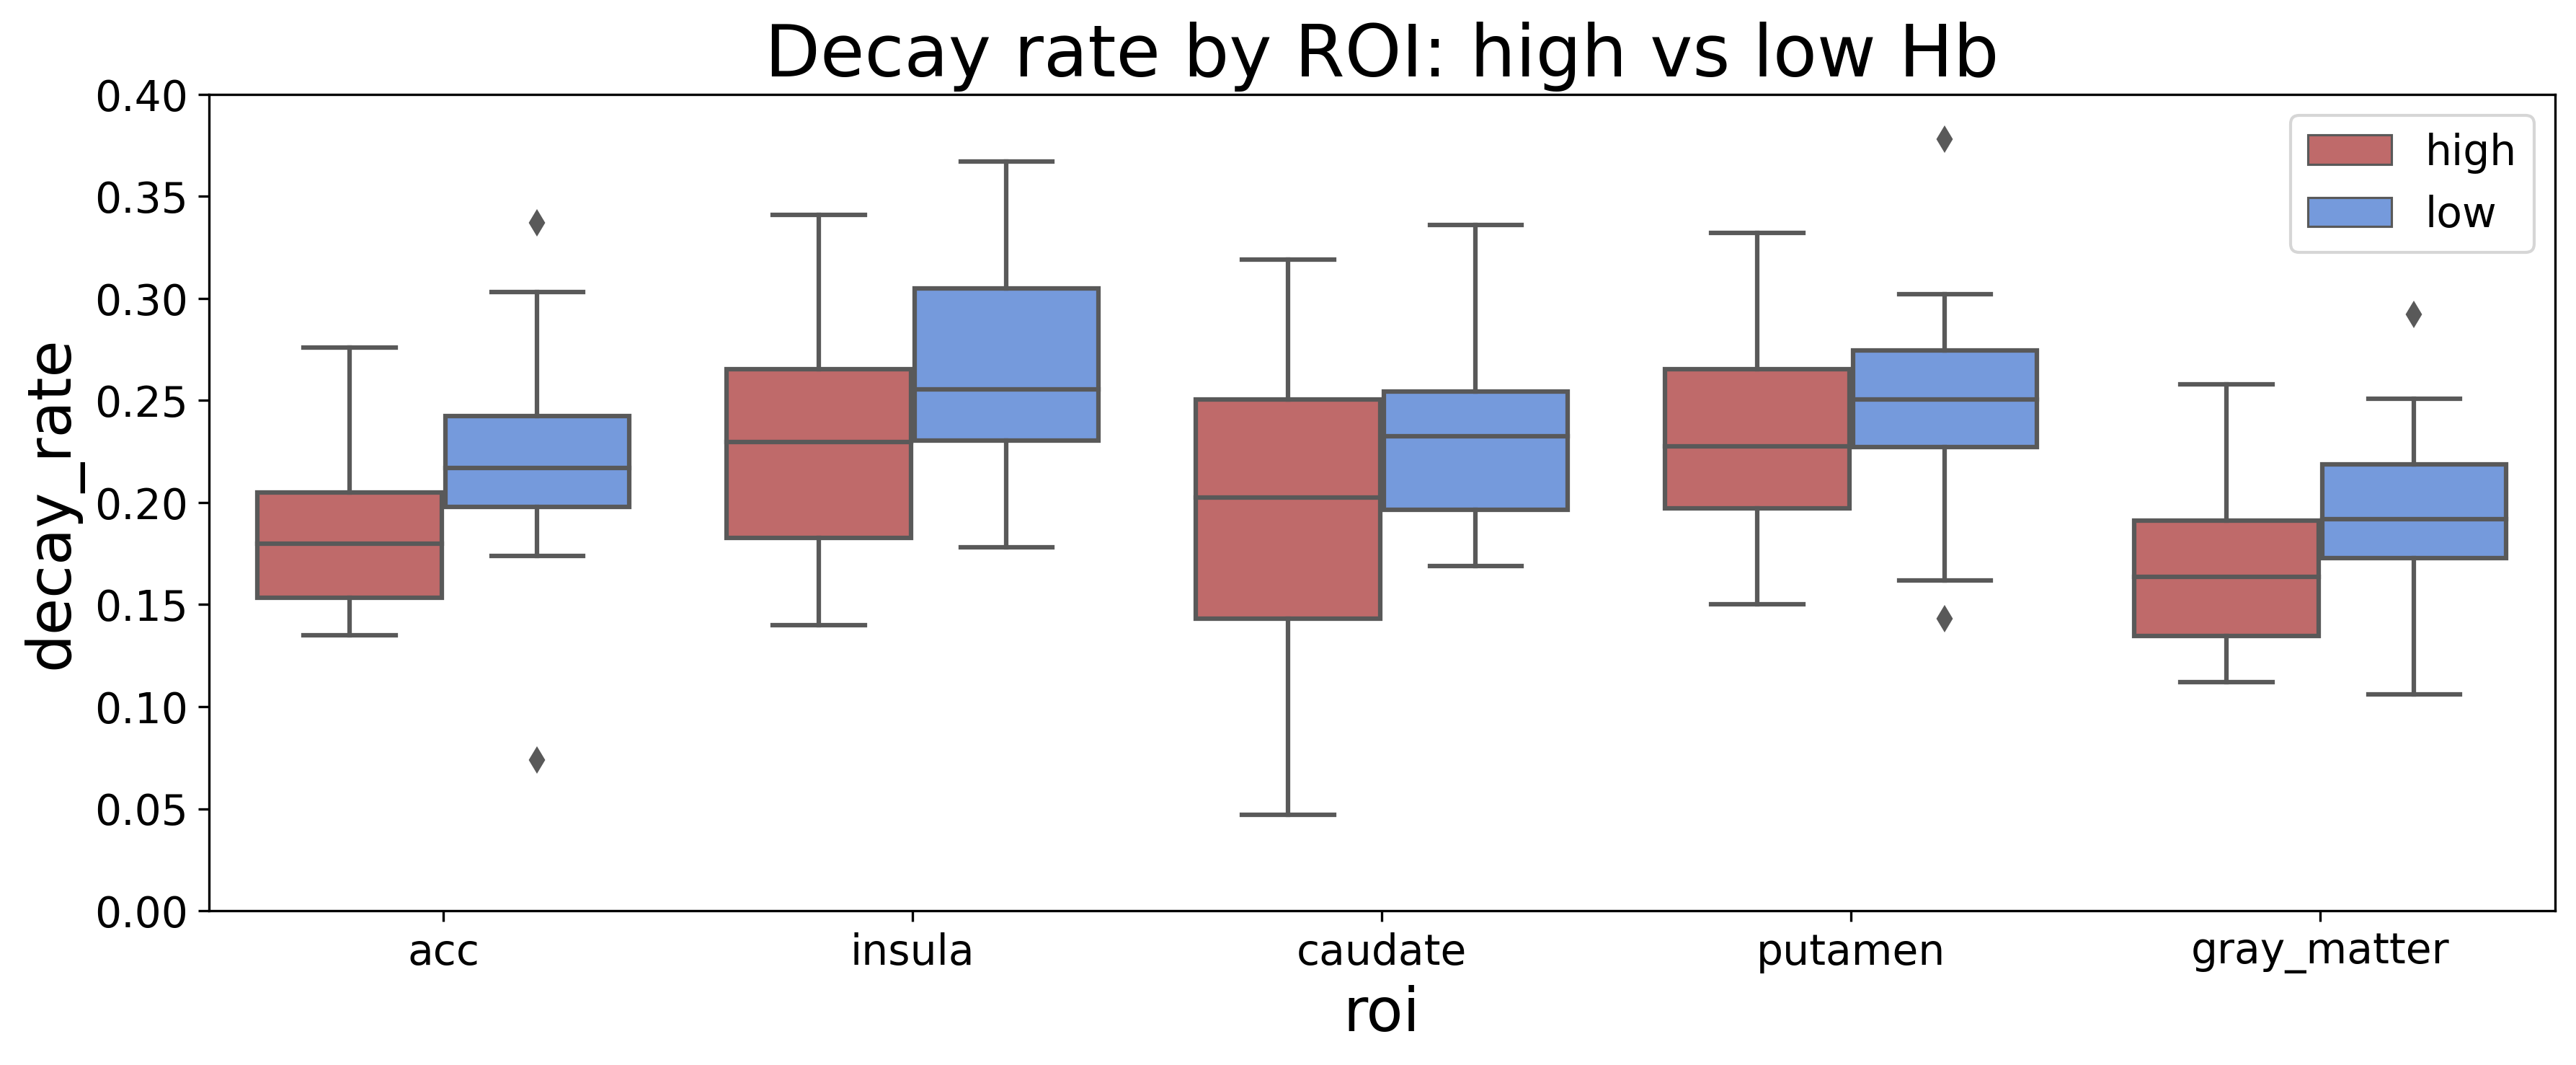

In [36]:
fig2, ax3 = plt.subplots(figsize=(14,5))
ax3.set_ylim(0,0.4)
ax3 = sns.boxplot(x="roi", y="decay_rate", hue="group", data=result_df, palette=['indianred', 'cornflowerblue'])
ax3.legend(fontsize=14)
plt.title("Decay rate by ROI: high vs low Hb")

Text(0.5, 1.0, 'Magnitude of dM/M0 by ROI: high vs low Hb')

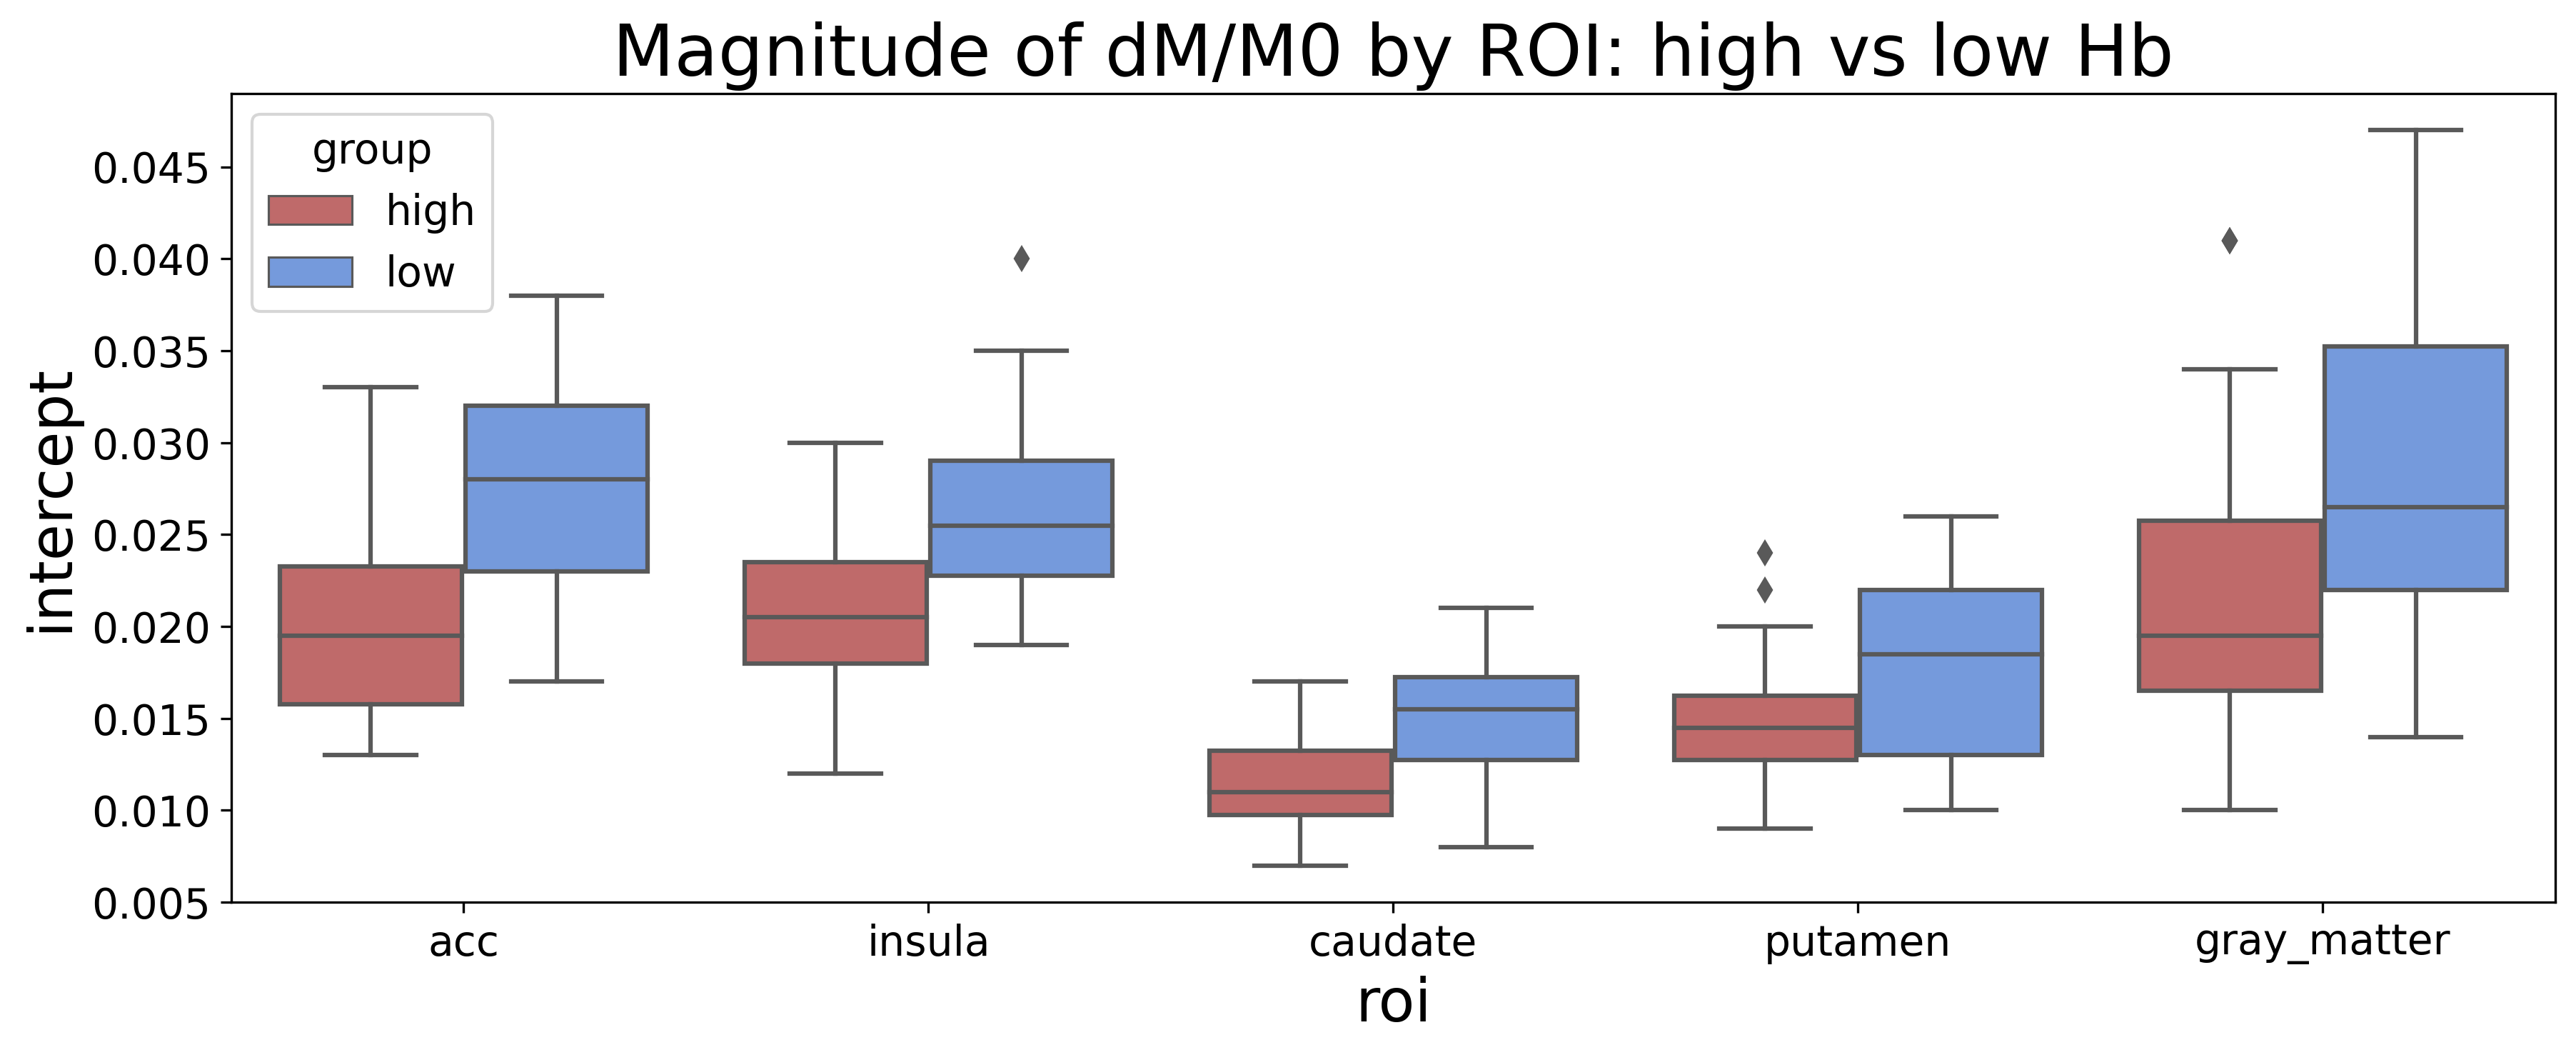

In [37]:
fig2, ax4 = plt.subplots(figsize=(14,5))
ax4 = sns.boxplot(x="roi", y="intercept", hue="group", data=result_df,  palette=['indianred', 'cornflowerblue'])
plt.title("Magnitude of dM/M0 by ROI: high vs low Hb")